In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import pickle
import time
import os

## Load Preprocessed Data

In [2]:
# Load the preprocessed data
with open('../data/preprocessed_data.pkl', 'rb') as f:
    data_dict = pickle.load(f)

X_train = data_dict['X_train']
X_test = data_dict['X_test']
y_train = data_dict['y_train']
y_test = data_dict['y_test']

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (56000, 784)
Test set: (14000, 784)


## Train KNN Classifier

We'll train multiple KNN models with different values of k to find the optimal one.

In [3]:
# For faster training, use a subset of data
# You can increase this for better accuracy
train_samples = 10000
test_samples = 2000

X_train_subset = X_train[:train_samples]
y_train_subset = y_train[:train_samples]
X_test_subset = X_test[:test_samples]
y_test_subset = y_test[:test_samples]

print(f"Using {train_samples} training samples and {test_samples} test samples")

Using 10000 training samples and 2000 test samples


In [4]:
# Test different k values
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    print(f"\nTraining KNN with k={k}...")
    start_time = time.time()
    
    # Create and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train_subset, y_train_subset)
    
    # Predict on test set
    y_pred = knn.predict(X_test_subset)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_subset, y_pred)
    accuracies.append(accuracy)
    
    elapsed_time = time.time() - start_time
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Training time: {elapsed_time:.2f} seconds")


Training KNN with k=1...
Accuracy: 0.9560 (95.60%)
Training time: 20.01 seconds

Training KNN with k=3...
Accuracy: 0.9560 (95.60%)
Training time: 20.01 seconds

Training KNN with k=3...
Accuracy: 0.9490 (94.90%)
Training time: 0.48 seconds

Training KNN with k=5...
Accuracy: 0.9490 (94.90%)
Training time: 0.48 seconds

Training KNN with k=5...
Accuracy: 0.9480 (94.80%)
Training time: 0.50 seconds

Training KNN with k=7...
Accuracy: 0.9480 (94.80%)
Training time: 0.50 seconds

Training KNN with k=7...
Accuracy: 0.9405 (94.05%)
Training time: 0.48 seconds

Training KNN with k=9...
Accuracy: 0.9405 (94.05%)
Training time: 0.48 seconds

Training KNN with k=9...
Accuracy: 0.9410 (94.10%)
Training time: 0.48 seconds
Accuracy: 0.9410 (94.10%)
Training time: 0.48 seconds


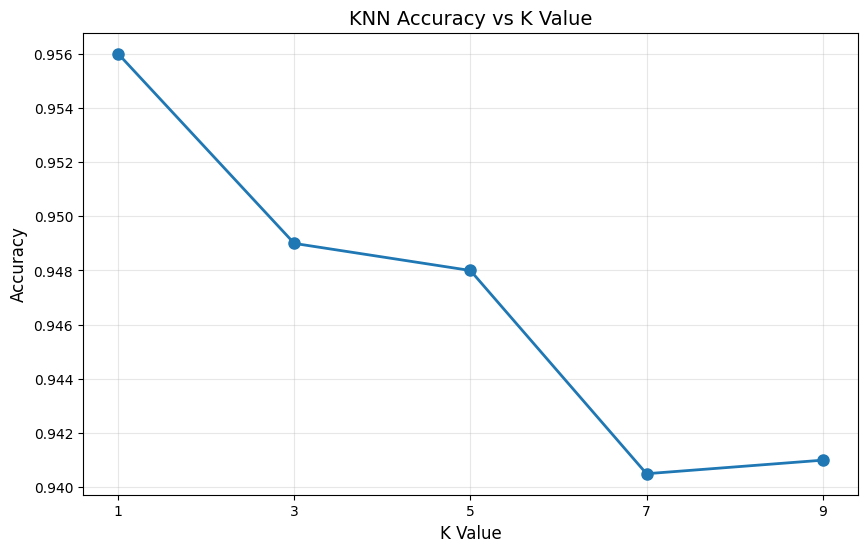


Best k value: 1 with accuracy: 0.9560


In [5]:
# Plot accuracy vs k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linewidth=2, markersize=8)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN Accuracy vs K Value', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

# Find best k
best_k = k_values[np.argmax(accuracies)]
print(f"\nBest k value: {best_k} with accuracy: {max(accuracies):.4f}")

## Train Final Model with Best K

In [6]:
# Train final model with best k value on full training set
print(f"Training final KNN model with k={best_k} on full training set...")
start_time = time.time()

final_knn = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
final_knn.fit(X_train_subset, y_train_subset)

elapsed_time = time.time() - start_time
print(f"Training completed in {elapsed_time:.2f} seconds")

Training final KNN model with k=1 on full training set...
Training completed in 0.03 seconds


## Evaluate Final Model

In [8]:
# Make predictions on test set
print("Making predictions on test set...")
y_pred = final_knn.predict(X_test_subset)

# Calculate accuracy
accuracy = accuracy_score(y_test_subset, y_pred)
print(f"\nFinal Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

Making predictions on test set...

Final Model Accuracy: 0.9560 (95.60%)

Final Model Accuracy: 0.9560 (95.60%)


In [9]:
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_subset, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       216
           1       0.94      0.99      0.96       221
           2       0.98      0.94      0.96       185
           3       0.96      0.95      0.96       207
           4       0.95      0.94      0.95       195
           5       0.94      0.94      0.94       190
           6       0.96      0.99      0.97       207
           7       0.95      0.94      0.95       214
           8       0.97      0.93      0.95       174
           9       0.93      0.93      0.93       191

    accuracy                           0.96      2000
   macro avg       0.96      0.95      0.96      2000
weighted avg       0.96      0.96      0.96      2000



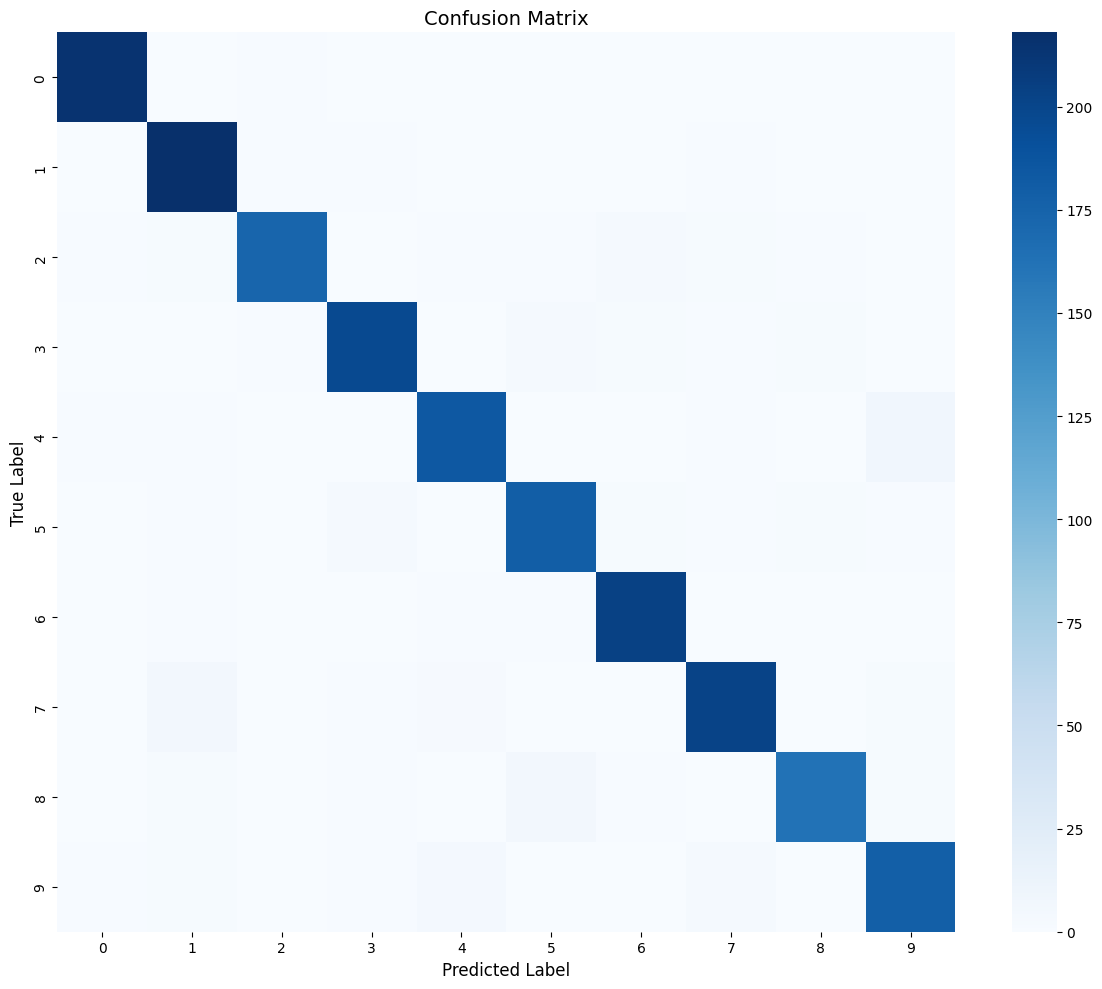

In [10]:
# Create confusion matrix
cm = confusion_matrix(y_test_subset, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.tight_layout()
plt.show()

## Visualize Predictions

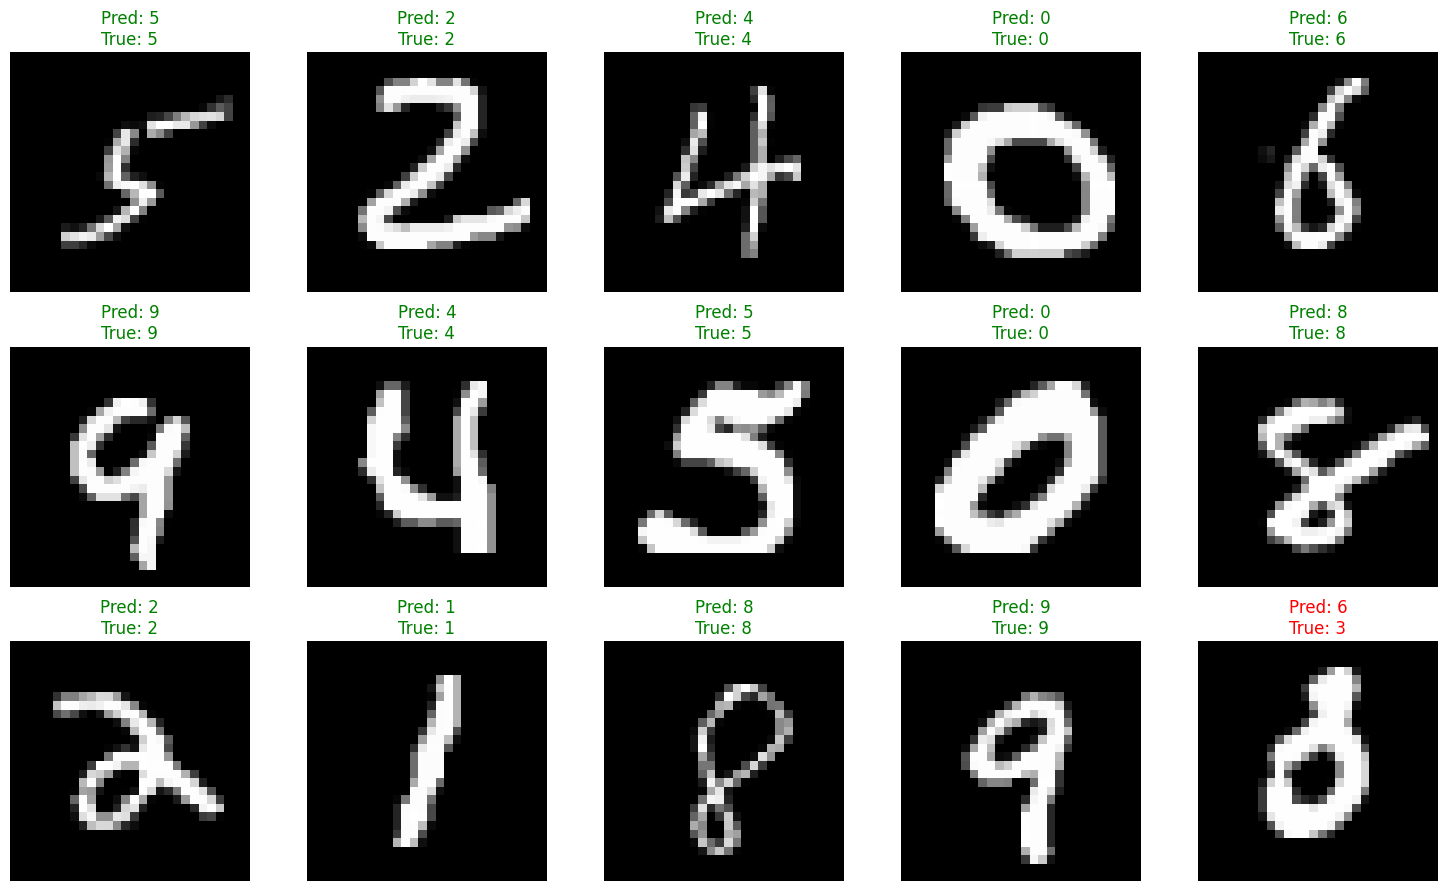

In [11]:
# Display some predictions
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.ravel()

for i in range(15):
    idx = np.random.randint(0, len(X_test_subset))
    
    # Make prediction
    pred = final_knn.predict(X_test_subset[idx].reshape(1, -1))[0]
    true_label = y_test_subset[idx]
    
    # Display image
    axes[i].imshow(X_test_subset[idx].reshape(28, 28), cmap='gray')
    
    # Set title with prediction and true label
    color = 'green' if pred == true_label else 'red'
    axes[i].set_title(f'Pred: {pred}\nTrue: {true_label}', color=color)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Save the Trained Model

In [12]:
# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the trained model
model_path = '../models/knn_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(final_knn, f)

print(f"Model saved successfully to '{model_path}'")
print(f"Model parameters: k={best_k}, accuracy={accuracy:.4f}")

Model saved successfully to '../models/knn_model.pkl'
Model parameters: k=1, accuracy=0.9560


In [13]:
# Save model metadata
metadata = {
    'k_value': best_k,
    'accuracy': accuracy,
    'training_samples': len(X_train_subset),
    'test_samples': len(X_test_subset),
    'classes': np.unique(y_train_subset).tolist()
}

with open('../models/model_metadata.pkl', 'wb') as f:
    pickle.dump(metadata, f)

print("\nModel metadata saved successfully")
print("\n=== Model Summary ===")
for key, value in metadata.items():
    print(f"{key}: {value}")


Model metadata saved successfully

=== Model Summary ===
k_value: 1
accuracy: 0.956
training_samples: 10000
test_samples: 2000
classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
